# CS534 Machine Learning - Spring 2020
**Midterm (120+10 points) - Submitted by: Michael Wendell**

In [21]:
#needed classes
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Question 1 (20 points): Design and implement an approach using power method to determine the first dimension of the PCA transformation (do not use scikit-learn library and SVD decomponsition).

In [22]:
#determine the eigenvalue through eq
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

#calls power method on array A
def power_method(A):
    
    n, dim = A.shape
    vectors = np.ones(dim) / np.sqrt(dim)
    
    ev = eigenvalue(A, vectors)

    #finds new eigenvalue until epsilon is less than .01 or 100 iterations
    for i in range(100):
        Av = A.dot(vectors)
        vec_new = Av / np.linalg.norm(Av)
        ev_new = eigenvalue(A, vec_new)
        
        #breaks if epsilon is too small
        if np.abs(ev - ev_new) < 0.01:
            break

        vecotors = vec_new
        ev = ev_new

    return ev_new, vec_new

In [23]:
A = np.array([[1, 2], [3, 4]])
ev, vec = power_method(A)
print("eigenvalue:", ev, "\neigenvectors:", vec)

eigenvalue: 5.344827586206896 
eigenvectors: [0.3939193  0.91914503]


Question 2 (20 points): Design and implement an approcch to determine the second dimension of the PCA transformation (do not use scikit-learn library and SVD decomponsition). 

In [24]:
#the second eigenvector can be found by removing the first from the matrix and then using the power method again.
A_2 =  A - ev * vec * vec.T
ev_2, vec_2 = power_method(A_2)
print("eigenvalue:", ev_2, "\neigenvectors:", vec_2)

eigenvalue: 0.10492155769690159 
eigenvectors: [-0.81696786  0.5766832 ]


Extra Credit (10 points): Design and implement a gradient approach to determine the first and second dimension of the PCA transformation by using a gradient optimization approach (compute derivatives). Suggestion optimize the Lagrange function.

Question 3 (10 points): Describe the benefit of the power method w.r.t. the SVD approach for the PCA transformation.

The power method allows us to apply PCA in a simple way by iterating matrixes to approxamiate the eigenvalues and vectors of a matrix and then getting the principal compenents from it. The big difference between PCA and SVD is that PCA will ignore less signifigant components and focus on the larger eigenvalues. SVD decomposses all the values into independent featurer matrixes.

Question 4 (20 points): By using a binary classifier (logistic regression or SVM) please implement in python. the 2 different procedures (one vs. one, one vs. rest) to handle the problem of more than two different classes (use the iris dataset). Do not use scikit-learn library for the main procedures, but you can use scikit-learn library for the binary logistic regression and SVM. For reference use the following link
https://en.wikipedia.org/wiki/Multiclass_classification

In [25]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
labels = iris['species'].unique()
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
#the one versus rest model for logistic classification
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Model Accuracy Score testing:',accuracy_score(y_test, y_pred)*100,'%')

Model Accuracy Score testing: 95.55555555555556 %


In [28]:
#the one versus one model for SVM classification
model = SVC(decision_function_shape='ovo')
model.fit(X, y)
ypred = model.predict(X)
print('Model Accuracy Score testing:',accuracy_score(y_test, y_pred)*100,'%')

Model Accuracy Score testing: 95.55555555555556 %


In [29]:
#determine true or false for each primary classifier
for k in labels:
    iris[k] = (iris['species'] == k)*1

In [30]:
#one vs all classifier finds best classifier and uses that one.
argmax = 0
primary = ''
for x in labels:
    X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    y = iris[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    arg = sum(pred) / len(pred)
    if arg > argmax:
        argmax = arg
        primary = x
        y_pred = pred
        test = y_test
print("primary classifier:", primary)
print('Model Accuracy Score testing:',accuracy_score(test, y_pred)*100,'%')

primary classifier: versicolor
Model Accuracy Score testing: 93.33333333333333 %


In [31]:
#split data into seperate one vs one classifiers
argmax = 0
primary = ''
for x in range(len(labels)):
    if (x+1 >= len(labels)):
        iris_c = iris[iris['species'] != labels[x+1 - len(labels)]]
    else:
        iris_c = iris[iris['species'] != labels[x+1]]
    X = iris_c[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    y = iris_c[labels[x]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    arg = sum(pred) / len(pred)
    if arg > argmax:
        argmax = arg
        primary = labels[x]
        predmod = pred
        
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[primary]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("primary classifier:", primary)
print('Model Accuracy Score testing:',accuracy_score(y_test, y_pred)*100,'%')

primary classifier: setosa
Model Accuracy Score testing: 100.0 %


Question 5 (20 points): Extensively describe the overfitting and underfitting problem. Use execution examples with decision tree and SVM (with and without kernels and their parameters). You can use the scikit implementations of decision tree and svm.

In [32]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

Overfitting is an issue when the model is trained too accuratly to the training data and results in poor predictions on future data. This is because the model as fit too close to the training data, but the data is not entirely representative of the test data or the whole population. This can happen when using a descision tree since it is very flexible. The tree below is an example of overfitting as there are fewer samples in the training data, so the accuracy will trend downward because the tree will fit closer to the training set.

In [36]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Model Accuracy Score training:',accuracy_score(y_train, y_pred)*100,'%')
y_pred = clf.predict(X_test)
print('Model Accuracy Score testing:',accuracy_score(y_test, y_pred)*100,'%')

Model Accuracy Score training: 100.0 %
Model Accuracy Score testing: 66.44295302013423 %


Underfitting is the issue of an inaccurate model that will most likely predict future data incorrectly and even training data since it has not been tuned well.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=60)

In [38]:
model = SVC()
model.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('Model Accuracy Score training:',accuracy_score(y_train, y_pred)*100,'%')
y_pred = model.predict(X_test)
print('Model Accuracy Score testing:',accuracy_score(y_test, y_pred)*100,'%')

Model Accuracy Score training: 73.33333333333333 %
Model Accuracy Score testing: 100.0 %


Question 6 (10 points): Show examples or situations when the use of kernel procedure is more efficient in terms of training and prediction computational time w.r.t polynomial features transformation.

The kernal procedure is used to simplify data transformation when the data is not linearly seperable as shown below. Also below is an example using the kernal procedure to fit the iris data. Since the data is not easily seperable the kernal can create higher accuracy.

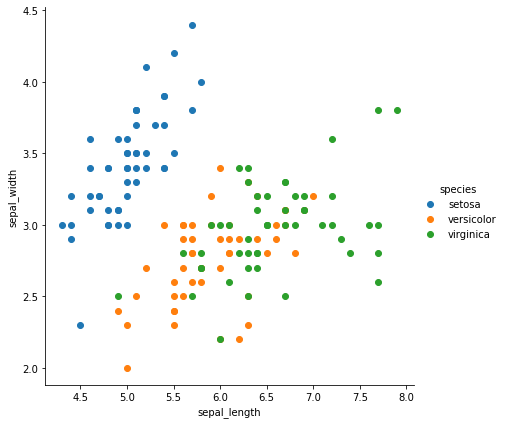

In [39]:
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100,'%')
 
svc = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy Kernal:', accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 100.0 %
Accuracy Kernal: 100.0 %


Question 7 (10 points): Write a procedure to estimate in the SVC classifier (in Scikit) the best kernel (RBF, Polynomial, sigmoid), the best gamma or degree, and the best C. Use the grid search in scikit without implementing it. You approacch shoud determine the best parametters.

Use the following reference:
https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
https://scikit-learn.org/stable/modules/grid_search.html

In [41]:
parameters = [{"kernel": ["rbf", "poly", "sigmoid"], "gamma": [1.0, 0.1 ,.01, 1e-3], "C": [0.1, 1, 10, 100, 1000], 
               "degree": [1, 2, 3, 4, 5]}]

grid = GridSearchCV(SVC(), parameters, refit=True)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test)


{'C': 0.1, 'degree': 1, 'gamma': 1.0, 'kernel': 'poly'}
SVC(C=0.1, degree=1, gamma=1.0, kernel='poly')


Question 8 (10 points): Create examples to explain the properties and the importance of the following kernels: Graph kernel, String kernel, Sigmoid kernel. Search on the web.

The graph kernal, string kernel, and sigmoid kernel are all different ways to use kernels for comparisons in real modeles. below is an example of using the kernel to idenitify trends on a graph.

[]

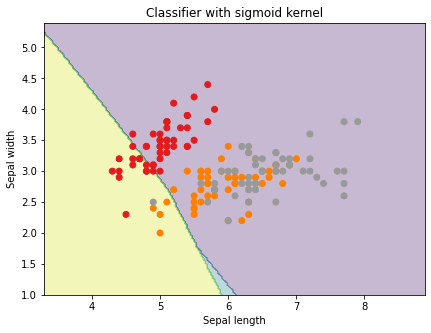

In [43]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

model = SVC(kernel='sigmoid', C=1).fit(X, y)
Z = model.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Classifier with sigmoid kernel')
plt.plot()